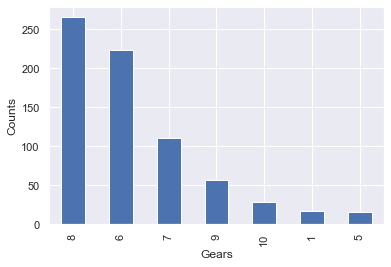

In [2]:
# fuel efficiencey analysis 2019 vehicles
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read in raw data file
df = pd.read_csv("http://media.sundog-soft.com/SelfDriving/FuelEfficiency.csv")

# visualize the gear counts with bar chart
gear_counts = df['# Gears'].value_counts()

# set seaborn
sns.set()

# set plot labels
plt.xlabel('Gears')
plt.ylabel('Counts')

# plot the gear counts
gear_counts.plot(kind='bar')


In [3]:
# display complete dataset (partial)
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


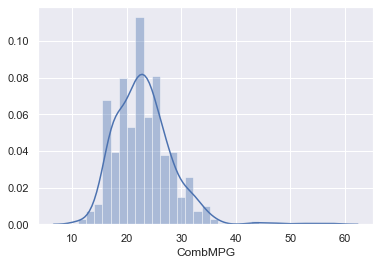

In [4]:
# distplot: plot a histogram with smooth distribution ot that histogram overlaid on top
sns.distplot(df['CombMPG'])

In [5]:
# Assemble selected columns into a new dataframe 
df2 = df[['Cylinders', 'CityMPG', 'HwyMPG', 'CombMPG']]
df2.head()

,Cylinders,CityMPG,HwyMPG,CombMPG
0,8,18,25,21
1,16,9,14,11
2,8,12,20,15
3,8,15,25,18
4,8,14,23,17


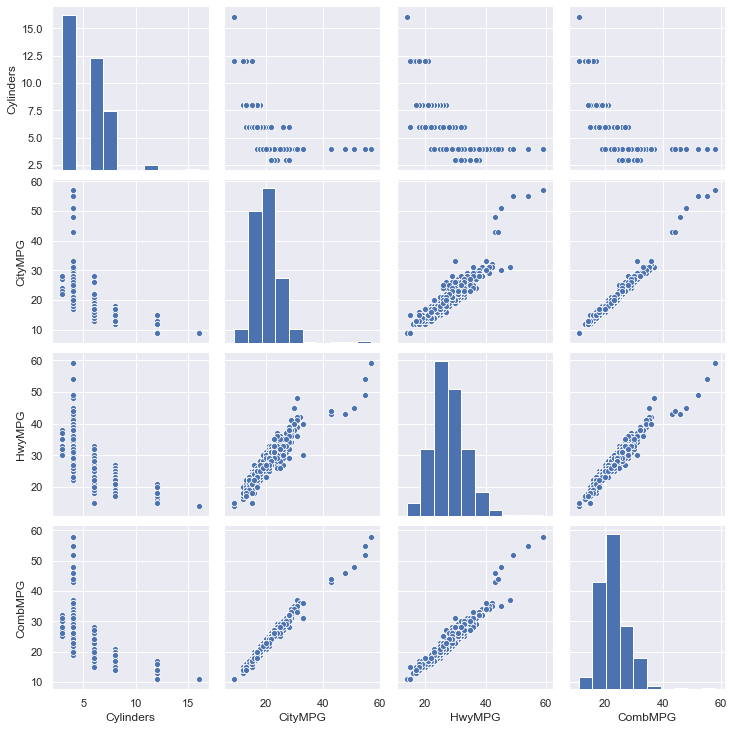

In [6]:
# To draw the connection between cylinders and city/hwy/comb MPG. We can use a scatterplot to display the relationships
# seaborn pairplot
sns.pairplot(df2, height=2.5)

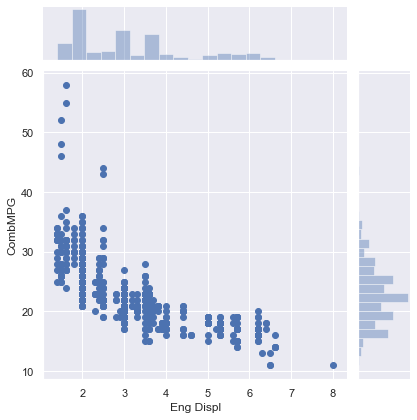

In [8]:
# Joint plot between number of cylinders and MPG
# joint plot show the scatterplot with histogram of two individual axis
sns.jointplot(x="Eng Displ", y="CombMPG", data=df)

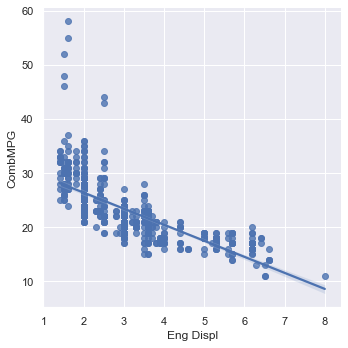

In [9]:
# to apply linear regression in the scatterplot. We can use implot: scattterplot with linear regression build in
sns.lmplot(x="Eng Displ", y="CombMPG", data=df)

[Text(0, 0, 'aston martin'),
 Text(0, 0, 'Volkswagen Group of'),
 Text(0, 0, 'General Motors'),
 Text(0, 0, 'Ferrari'),
 Text(0, 0, 'FCA US LLC'),
 Text(0, 0, 'Jaguar Land Rover L'),
 Text(0, 0, 'MAZDA'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Subaru'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Ford Motor Company'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Rolls-Royce'),
 Text(0, 0, 'Volvo'),
 Text(0, 0, 'Kia'),
 Text(0, 0, 'Maserati'),
 Text(0, 0, 'Mitsubishi Motors Co')]

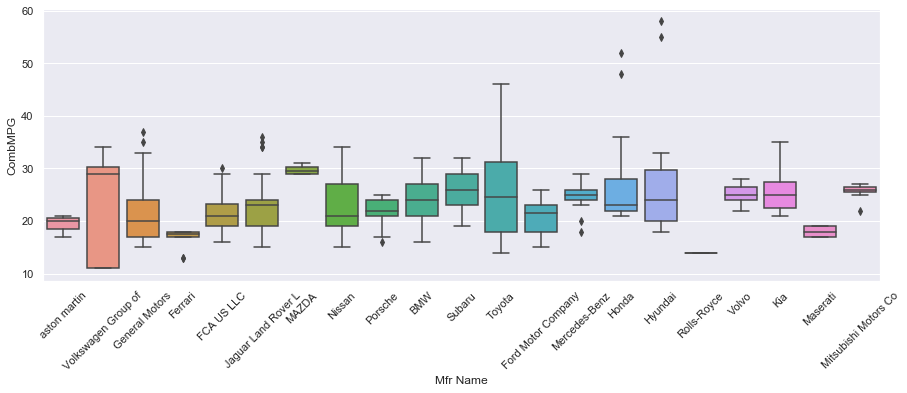

In [10]:
# boxplot for all the auto manufacturers and the MPG
# display the range, mean of each auto companies with their MPG data
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

[Text(0, 0, 'aston martin'),
 Text(0, 0, 'Volkswagen Group of'),
 Text(0, 0, 'General Motors'),
 Text(0, 0, 'Ferrari'),
 Text(0, 0, 'FCA US LLC'),
 Text(0, 0, 'Jaguar Land Rover L'),
 Text(0, 0, 'MAZDA'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Subaru'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Ford Motor Company'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Rolls-Royce'),
 Text(0, 0, 'Volvo'),
 Text(0, 0, 'Kia'),
 Text(0, 0, 'Maserati'),
 Text(0, 0, 'Mitsubishi Motors Co')]

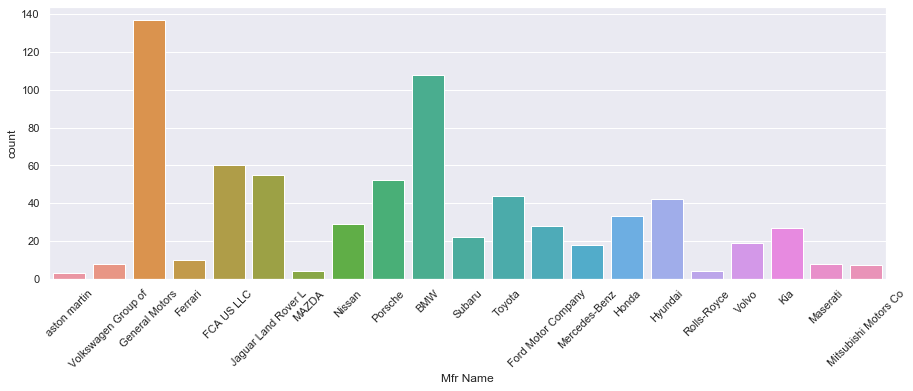

In [11]:
# corresponding countplot for the same dataframe
ax=sns.countplot(x='Mfr Name', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

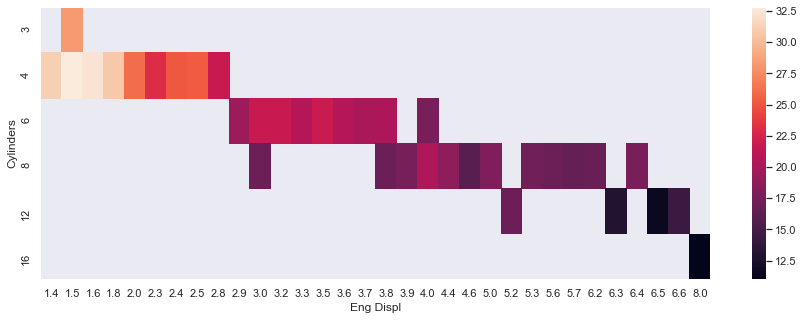

In [12]:
# heatmap for the tabular data. 
# Higher mpg associated with lower numbers of cylinders and lower engine displacement values. 
df2 = df.pivot_table(index='Cylinders', columns='Eng Displ', values='CombMPG', aggfunc='mean')
sns.heatmap(df2)